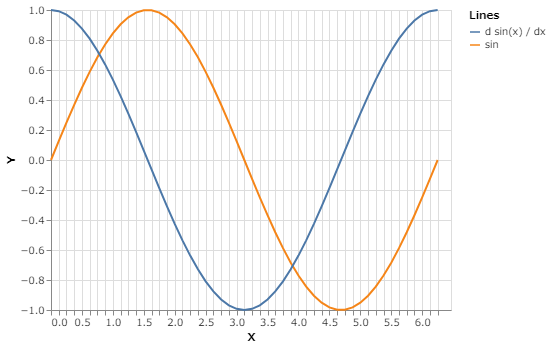

In [2]:
:set -XOverloadedStrings
import Torch
import Graphics.Vega.VegaLite
import IHaskell.Display.Hvega (vlShow)

sin' :: Tensor -> IO Tensor
sin' x = do
  tx <- makeIndependent x
  return $ head $ grad (Torch.sumAll $ Torch.sin (toDependent tx)) [tx]

res = 50
step=2*3.141592/res
tdat = Torch.sin ((asTensor [0..res]) * step)
tdat' <- sin' ((asTensor [0..res]) * step)
xydat :: [(Double,(Double,Double))]
xydat =
 zip [0,step..] $
 zip (asValue tdat)
     (asValue tdat')
axis = PAxis [ AxValues (Numbers (map fst xydat))]
enc = encoding
    . position X [ PName "X", PmType Quantitative, axis ]
    . position Y [ PName "Y", PmType Quantitative ]
    . color [ MName "Lines", MmType Nominal ]

dat' = foldl
            (\sum' (x,(y,y')) ->
               sum' .
               dataRow [ ("X", Number x)
                       , ("Y", Number y)
                       , ("Lines",   Str "sin")
                       ] .
               dataRow [ ("X", Number x)
                       , ("Y", Number y')
                       , ("Lines",   Str "d sin(x) / dx")
                       ]
            )
            (dataFromRows [])
            xydat
vlShow $ toVegaLite
   [ dat' []
   , mark Line []
   , enc []
   , height 300
   , width 400
   ]